# This Notebook shows how the disaggregator works for the sectors CTS and industry

The disaggregator enables the user to generate DataFrames with:
- spatial data, by using functions from the `spatial` module
- temporal data, by using functions from the `temporal` module

## General Settings and functions

In [2]:
# at first, the user has to import the respective packages and modules from the disaggregator
import pandas as pd
import numpy as np
from disaggregator import config, data, spatial, temporal, plot
import matplotlib.pyplot as plt

#### Base year
- By setting the `base year` in the `config.yaml`, you define the year on which the spatial and temporal functions operate
- some functions are not affected, e. g. ``generate_specific_consumption_per_branch()`` because it makes use of particular publications from these years

#### Region Codes
Since different statistics and publications use different notations for region codes, we compiled a dictionary that can be used to transform the different codes.
- The function ``config.dict_region_code()`` returns a dictionary with conversions of different kinds of region denotation, if ``raw = False``
- the dictionary can convert between the following designations ``ags_lk``, ``id_ags``, ``id_ags_lk``, ``id_nuts3``, ``id_t_nuts3_lk``, ``name``, ``natcode_nuts3``

In [2]:
config.dict_region_code(raw=True).head()

,ags_lk,id_ags,id_ags_lk,id_nuts3,id_t_nuts3_lk,name,natcode_nuts3
idx,,,,,,,
0,3152,3152000,21,27600021,21,Göttingen,DE915
1,3156,3156000,25,27600025,25,Osterode am Harz,DE919
2,1001,1001000,1,27600001,1,"Flensburg, Kreisfreie Stadt",DEF01
3,1002,1002000,2,27600002,2,"Kiel, Kreisfreie Stadt",DEF02
4,1003,1003000,3,27600003,3,"Lübeck, Kreisfreie Stadt",DEF03


## Spatial Functions

The spatial functions perform the task to calculate energy demand per district and branch. Therefore, a specific energy consumption in `MWh/employee` is calculated per branch and district using information from the database. The functions that perform this task are called `generate_specific_consumption_per_branch()` and `generate_specific_consumption_per_branch_and_district()`. Their ouput is also saved in the folder `data_in`.
Subsequently, the specific consumption consumption is multiplied with the number of employees in each branch and district. This is done by the function `disagg_CTS_industry()`. This function also calls the aforementioned functions, if the folder `data_in` does not contain the respective output.

#### Function ``disagg_CTS_industry()``
- returns a DataFrame with absolute gas or electricity consumption per branch and district for the sectors CTS or industry in **MWh** for the ``base year`` (see ``config.yaml``)
- uses files "../data_in/regional/specific_`source`_consumption.csv", with ``source`` being in [``power``, ``gas``], if file does not exist, the function ``generate_specific_consumption_per_branch_and_district()`` is called

In [7]:
df_abs_econ_dis_branch_CTS = spatial.disagg_CTS_industry(source = 'power', sector = 'CTS', use_nuts3code=True) # also possible: source='gas', sector ='industry'
# get dictionary for renaming columns
dic = config.dict_region_code(keys='natcode_nuts3', values='name')
df_abs_econ_dis_branch_CTS.rename(columns=dic).head()

,"Flensburg, Kreisfreie Stadt","Kiel, Kreisfreie Stadt","Lübeck, Kreisfreie Stadt","Neumünster, Kreisfreie Stadt",Dithmarschen,Herzogtum Lauenburg,Nordfriesland,Ostholstein,Pinneberg,Plön,...,Sömmerda,Hildburghausen,Ilm-Kreis,Weimarer Land,Sonneberg,Saalfeld-Rudolstadt,Saale-Holzland-Kreis,Saale-Orla-Kreis,Greiz,Altenburger Land
WZ,,,,,,,,,,,,,,,,,,,,,
1,278.613484,1243.044776,1928.862583,3664.838908,31504.755524,14012.017687,25482.417904,18752.830669,42542.135861,14745.082858,...,24046.486870,14151.605925,9935.120169,18474.217185,3879.156973,14980.832729,27882.780229,29425.870296,20107.112173,15880.968601
2,0.000000,49.822825,54.430913,0.000000,18.696504,971.732113,8.064970,84.670308,67.871916,435.447300,...,19.956501,290.439081,275.892430,107.256266,1264.816441,229.819408,24.705839,532.213367,199.857928,0.000000
3,0.000000,0.000000,1081.912997,0.000000,2615.861858,104.510318,4613.429094,1046.344743,356.329406,713.416870,...,0.000000,36.658340,93.914547,0.000000,0.000000,441.283998,147.408823,332.927873,0.000000,0.000000
36,0.000000,16917.988254,0.000000,0.000000,0.000000,8190.370493,3498.114316,5837.385789,10491.334771,0.000000,...,8655.968414,2872.877928,7359.990418,4905.756829,40296.263099,23418.305060,2620.079185,6435.012265,15715.617801,14532.732944
37,13045.394931,1593.907460,0.000000,8210.603187,2254.487844,19668.618823,8526.395617,2432.355116,11636.024520,3606.288363,...,3606.818157,0.000000,3066.802673,6000.056175,2870.711796,2684.235657,1489.556858,2681.377515,0.000000,4722.459548


(<Figure size 302.4x475.2 with 2 Axes>,
 array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000201E5280AC8>]],
       dtype=object))

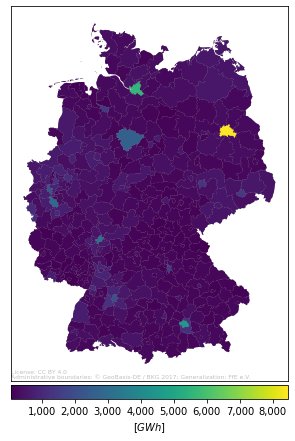

In [6]:
# plot your result using functions from the plot module
plot.choropleth_map(df_abs_econ_dis_branch_CTS.sum()/1000, relative = False, unit = 'GWh')

### Functions that work in the background:

#### Function ``generate_specific_consumption_per_branch_and_district()``
- Returns specific power and gas consumption per branch and district.
- saves result in ``../data_in/regional/specific_power_consumption.csv`` and ``../data_in/specific_gas_consumption.csv``
- Takes number of iterations as arguments, 8 is recommended. Look at docstring for clarification.

In [5]:
df_spec_econ_district, df_spec_gcon_district = data.generate_specific_consumption_per_branch_and_district(8,8)

In [6]:
df_spec_econ_district.head()

,1001,1002,1003,1004,1051,1053,1054,1055,1056,1057,...,16068,16069,16070,16071,16072,16073,16074,16075,16076,16077
1,21.431806,21.431806,21.431806,21.431806,21.431806,21.431806,21.431806,21.431806,21.431806,21.431806,...,21.431806,21.431806,21.431806,21.431806,21.431806,21.431806,21.431806,21.431806,21.431806,21.431806
2,6.047879,6.047879,6.047879,6.047879,6.047879,6.047879,6.047879,6.047879,6.047879,6.047879,...,6.047879,6.047879,6.047879,6.047879,6.047879,6.047879,6.047879,6.047879,6.047879,6.047879
3,47.561125,47.561125,47.561125,47.561125,47.561125,47.561125,47.561125,47.561125,47.561125,47.561125,...,47.561125,47.561125,47.561125,47.561125,47.561125,47.561125,47.561125,47.561125,47.561125,47.561125
5,167.180743,238.494784,138.232790,144.713079,1001.644188,155.656725,400.074771,252.001533,235.649094,400.074771,...,400.074771,299.714927,400.074771,400.074771,400.074771,898.696747,225.113494,458.380276,223.771238,400.074771
6,76.647782,109.343313,63.375940,66.346975,459.226368,71.364336,183.423302,115.535786,108.038642,183.423302,...,183.423302,137.411068,183.423302,183.423302,183.423302,412.027792,103.208358,210.154776,102.592971,183.423302


In [7]:
df_spec_gcon_district.head()

,1001,1002,1003,1004,1051,1053,1054,1055,1056,1057,...,16068,16069,16070,16071,16072,16073,16074,16075,16076,16077
1,6.736410,6.736410,6.736410,6.736410,6.736410,6.736410,6.736410,6.736410,6.736410,6.736410,...,6.736410,6.736410,6.736410,6.736410,6.736410,6.736410,6.736410,6.736410,6.736410,6.736410
2,0.008478,0.008478,0.008478,0.008478,0.008478,0.008478,0.008478,0.008478,0.008478,0.008478,...,0.008478,0.008478,0.008478,0.008478,0.008478,0.008478,0.008478,0.008478,0.008478,0.008478
3,0.007103,0.007103,0.007103,0.007103,0.007103,0.007103,0.007103,0.007103,0.007103,0.007103,...,0.007103,0.007103,0.007103,0.007103,0.007103,0.007103,0.007103,0.007103,0.007103,0.007103
5,11.154951,11.154951,11.154951,11.154951,45.327550,11.154951,14.122494,14.122494,17.267132,14.122494,...,11.154951,11.154951,11.465445,11.154951,21.240471,13.777111,11.154951,11.154951,11.154951,11.154951
6,428.334392,198.598526,221.583619,270.955301,2294.159525,96.754835,714.780613,714.780613,873.939905,714.780613,...,268.890689,253.061313,580.299626,285.562813,1075.042201,697.299797,344.549566,399.374712,340.860342,323.162319


### Function ``generate_specific_consumption_per_branch()``
- this function is the basis for ``generate_specific_consumption_per_branch_and_district()``
- it returns number of employees, as well as absolute and specific power and gas consumption per industry and CTS branch (WZ08) in Germany for the year 2015
- the values are based on the publication [Umweltökonomische Gesamtrechnung, 2017](https://www.destatis.de/DE/Themen/Gesellschaft-Umwelt/Umwelt/Publikationen/Umweltnutzung-Wirtschaft/umweltnutzung-und-wirtschaft-energie-pdf-5850014.html) for 2015, which is also available from the DemandRegio database (table_id = 38, with some industry branches (WZ) being grouped together and with ET = 12 for gas and ET = 18 for electricity)


In [5]:
df_spez_econ, df_spez_gcon, df_abs_con, df_emp = data.generate_specific_consumption_per_branch()

In [6]:
## specific electricity consumption 
df_spez_econ.head()
## specific gas consumption 
df_spez_gcon.head()

,spez. GV
1,6.736410
2,0.008478
3,0.007103
5,58.078803
6,778.569888


In [7]:
## absolute consumption as in "Umweltökonomischer Gesamtrechnung" for the year 2015, in Database dimension='spatial', table_id=38,
df_abs_con.head()

,value,WZ,ET
idx,,,
19,1.547398e+06,1,12
23,4.923029e+06,1,18
30,1.657324e+02,2,12
33,1.182279e+05,2,18
39,1.765487e+01,3,12


In [8]:
## employees by branch and district
df_emp.head()

ags,1001,1002,1003,1004,1051,1053,1054,1055,1056,1057,...,16068,16069,16070,16071,16072,16073,16074,16075,16076,16077
WZ,,,,,,,,,,,,,,,,,,,,,
1,13.0,58.000000,90.000000,171.0,1470.000000,653.795456,1189.00000,875.0,1985.000000,688.0,...,1122.000000,660.308590,463.568957,862.000000,181.000000,699.00000,1301.000000,1373.0,938.190264,741.0
2,0.0,8.238066,9.000000,0.0,3.091415,160.673202,1.33352,14.0,11.222433,72.0,...,3.299752,48.023294,45.618046,17.734525,209.133881,38.00000,4.085042,88.0,33.045953,0.0
3,0.0,0.000000,22.747843,0.0,55.000000,2.197390,97.00000,22.0,7.492031,15.0,...,0.000000,0.770763,1.974607,0.000000,0.000000,9.27825,3.099355,7.0,0.000000,0.0
5,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.00000,0.0,0.000000,0.0,...,0.000000,0.000000,101.920112,0.000000,0.000000,0.00000,0.000000,0.0,0.000000,0.0
6,0.0,0.000000,0.000000,0.0,139.427145,0.000000,0.00000,0.0,0.000000,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.0,0.000000,0.0


## Temporal Functions

The temporal functions perform the task to calculate energy demand time series per district and branch. Therefore, the output from the `spatial` functions is needed. 

Furthermore, normalized load time series are generated for every branch and district. The CTS load time series for power and gas are standard load profiles*, the industry time series represent typical working shifts in the respective branch, with a low load level for non-working hours and a high load level for working hours. 9 different load profiles have been defined for industry representing 1-, 2- and 3-shift operation on 5, 6 and 7 days per week. Important functions, that fulfill the tasks in the background are `shift_load_profile_generator()`, `CTS_power_slp_generator()` as well as `t_allo()`, `h_value()`, `gas_slp_weekday_params` and `disagg_daily_gas_slp`.

The results of these functions are brought together in 3 functions:
- `disagg_temporal_power_CTS()` for the results on CTS for power
- `disagg_temporal_gas_CTS()` for the results on CTS for gas
- `disagg_temporal_industry()` for the results on industry for gas and power

Each of these 3 function has a boolean argument `detailed` which is set on `False` by default. If `detailed` is put on `True` the function will return a multi-index-DataFrame() which contains a time series per branch AND district. If set on `False` it will only contain aggregated time series per district.

### Function disagg_temporal_power_CTS()
- Disagreggate spatial data of CTS' **power** demand temporally in **MWh**
- returns DataFrame with districts as columns and timesteps as rows 
- if ``detailed = True``, returns DataFrame with multiindex in columns with ``level=0`` for districts and ``level=1`` for branches, timesteps as rows
- Uses temporal and spatial functions `disagg_CTS('power')` , `CTS_power_slp_generator` and information from `config.py`

In [10]:
df_CTS = temporal.disagg_temporal_power_CTS(detailed=False, use_nuts3code=True)

disaggregator.temporal: INFO     Working on state: SH.
disaggregator.temporal: INFO     ... creating state-specific load-profiles
disaggregator.temporal: INFO     ... assigning load-profiles to WZs
disaggregator.temporal: INFO     Working on state: HH.
disaggregator.temporal: INFO     ... creating state-specific load-profiles
disaggregator.temporal: INFO     ... assigning load-profiles to WZs
disaggregator.temporal: INFO     Working on state: NI.
disaggregator.temporal: INFO     ... creating state-specific load-profiles
disaggregator.temporal: INFO     ... assigning load-profiles to WZs
disaggregator.temporal: INFO     Working on state: HB.
disaggregator.temporal: INFO     ... creating state-specific load-profiles
disaggregator.temporal: INFO     ... assigning load-profiles to WZs
disaggregator.temporal: INFO     Working on state: NW.
disaggregator.temporal: INFO     ... creating state-specific load-profiles
disaggregator.temporal: INFO     ... assigning load-profiles to WZs
disaggrega

In [11]:
df_CTS.head()

,DEF01,DEF02,DEF03,DEF04,DEF05,DEF06,DEF07,DEF08,DEF09,DEF0A,...,DEG0D,DEG0E,DEG0F,DEG0G,DEG0H,DEG0I,DEG0J,DEG0K,DEG0L,DEG0M
2015-01-01 00:00:00,3.115564,8.379840,6.026278,2.727286,3.642590,3.686675,5.439147,5.122272,6.617861,2.154296,...,1.834572,1.247310,2.339211,1.945665,1.869235,2.747839,2.046323,2.031765,2.400117,2.177006
2015-01-01 00:15:00,3.272524,8.954310,6.343744,2.895361,3.784762,3.837316,5.734542,5.401852,6.876733,2.259250,...,1.873499,1.275523,2.423719,1.999271,1.934031,2.857229,2.091217,2.073656,2.464980,2.240333
2015-01-01 00:30:00,3.185879,8.686477,6.161881,2.814476,3.678429,3.743681,5.513620,5.203116,6.684633,2.182117,...,1.829904,1.242645,2.365671,1.948543,1.907598,2.791247,2.037906,2.015934,2.411546,2.193227
2015-01-01 00:45:00,3.109915,8.458016,6.000229,2.743821,3.586475,3.662532,5.309586,5.017806,6.517762,2.113354,...,1.794044,1.214799,2.316215,1.905113,1.886801,2.735422,1.993336,1.967264,2.367216,2.154155
2015-01-01 01:00:00,3.053411,8.291141,5.875231,2.690501,3.515937,3.602490,5.136775,4.859782,6.390216,2.057655,...,1.768597,1.194038,2.280938,1.872580,1.875832,2.695362,1.960433,1.930250,2.336541,2.127334


In [11]:
# export your data using
df_CTS.to_csv('./data_out/CTS_Power_2015_MWh.csv')

(<Figure size 864x216 with 2 Axes>,
 array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000201E5C7A4E0>]],
       dtype=object))

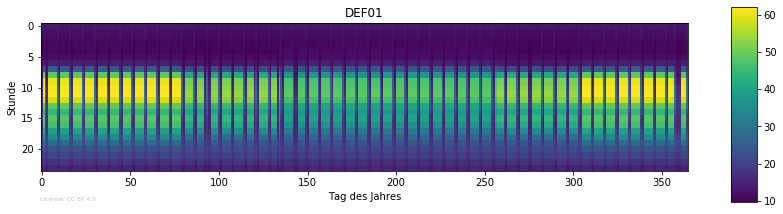

In [12]:
# or plot your data using
plot.heatmap_timeseries(df_CTS['DEF01'].resample('H').sum(), unit = 'MWh')

(<Figure size 302.4x475.2 with 2 Axes>,
 array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000201E59277B8>]],
       dtype=object))

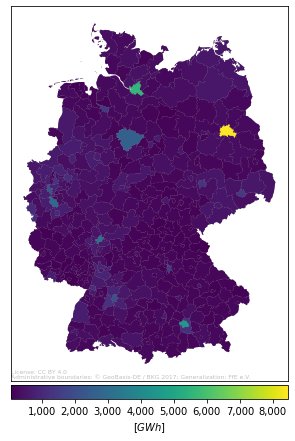

In [13]:
plot.choropleth_map(df_CTS.sum(axis=0)/1000, unit = "GWh", relative=False)

#### or use detailed Version of the function

In [23]:
df_CTS_detail = temporal.disagg_temporal_power_CTS(detailed=True, use_nuts3code=True)

disaggregator.temporal: INFO     Working on state: SH.
disaggregator.temporal: INFO     ... creating state-specific load-profiles
disaggregator.temporal: INFO     ... assigning load-profiles to WZs
disaggregator.temporal: INFO     Working on state: HH.
disaggregator.temporal: INFO     ... creating state-specific load-profiles
disaggregator.temporal: INFO     ... assigning load-profiles to WZs
disaggregator.temporal: INFO     Working on state: NI.
disaggregator.temporal: INFO     ... creating state-specific load-profiles
disaggregator.temporal: INFO     ... assigning load-profiles to WZs
disaggregator.temporal: INFO     Working on state: HB.
disaggregator.temporal: INFO     ... creating state-specific load-profiles
disaggregator.temporal: INFO     ... assigning load-profiles to WZs
disaggregator.temporal: INFO     Working on state: NW.
disaggregator.temporal: INFO     ... creating state-specific load-profiles
disaggregator.temporal: INFO     ... assigning load-profiles to WZs
disaggrega

In [42]:
# filter your results using multiindex
df_lk_DEF01 = df_CTS_detail.loc[:, 'DEF01']
df_lk_DEF01.head()

WZ,1,2,81,3,36,37,38,39,49,50,...,91,55,56,87,92,93,88,97,98,94
2015-01-01 00:00:00,0.005035,0.0,0.011680,0.0,0.0,0.279572,0.003571,0.0,0.343933,7.841506e-07,...,0.004717,0.038908,0.221993,0.084544,0.011768,0.027650,0.141953,0.004224,0.0,0.066772
2015-01-01 00:15:00,0.004757,0.0,0.011033,0.0,0.0,0.285756,0.003650,0.0,0.351541,8.014951e-07,...,0.005062,0.042482,0.242383,0.092309,0.012849,0.030189,0.169684,0.005050,0.0,0.098344
2015-01-01 00:30:00,0.004597,0.0,0.010662,0.0,0.0,0.287383,0.003671,0.0,0.353543,8.060594e-07,...,0.004885,0.039600,0.225939,0.086047,0.011977,0.028141,0.157273,0.004680,0.0,0.089323
2015-01-01 00:45:00,0.004478,0.0,0.010387,0.0,0.0,0.289661,0.003700,0.0,0.356345,8.124494e-07,...,0.004717,0.036660,0.209166,0.079659,0.011088,0.026052,0.145443,0.004328,0.0,0.081774
2015-01-01 01:00:00,0.004388,0.0,0.010177,0.0,0.0,0.293241,0.003746,0.0,0.360750,8.224909e-07,...,0.004565,0.033836,0.193051,0.073522,0.010234,0.024045,0.134002,0.003988,0.0,0.075891


In [41]:
# use DataFrame.reorder_levels to filter for CTS branches
df_wz_81 = df_CTS_detail.reorder_levels([1,0], axis=1).loc[:,81]
df_wz_81.head()

LK,DEF01,DEF02,DEF03,DEF04,DEF05,DEF06,DEF07,DEF08,DEF09,DEF0A,...,DEG0D,DEG0E,DEG0F,DEG0G,DEG0H,DEG0I,DEG0J,DEG0K,DEG0L,DEG0M
2015-01-01 00:00:00,0.011680,0.048792,0.056588,0.006384,0.007781,0.012692,0.016063,0.018931,0.037863,0.010812,...,0.004207,0.007543,0.007303,0.010061,0.002015,0.009326,0.007311,0.006664,0.006658,0.006163
2015-01-01 00:15:00,0.011033,0.046093,0.053458,0.006031,0.007351,0.011990,0.015174,0.017884,0.035768,0.010213,...,0.003974,0.007126,0.006899,0.009505,0.001904,0.008810,0.006906,0.006295,0.006289,0.005822
2015-01-01 00:30:00,0.010662,0.044541,0.051657,0.005828,0.007103,0.011586,0.014663,0.017282,0.034564,0.009870,...,0.003840,0.006886,0.006667,0.009185,0.001840,0.008513,0.006674,0.006083,0.006077,0.005626
2015-01-01 00:45:00,0.010387,0.043393,0.050327,0.005678,0.006920,0.011288,0.014286,0.016837,0.033673,0.009615,...,0.003741,0.006709,0.006495,0.008948,0.001792,0.008294,0.006502,0.005926,0.005921,0.005481
2015-01-01 01:00:00,0.010177,0.042516,0.049309,0.005563,0.006781,0.011060,0.013997,0.016496,0.032993,0.009421,...,0.003666,0.006573,0.006364,0.008767,0.001756,0.008126,0.006370,0.005806,0.005801,0.005371


### Function disagg_temporal_gas_CTS()
- Disagreggate spatial data of CTS' gas demand per hour for a given `state` in **MWh**
- Uses temporal and spatial functions like `disagg_daily_gas_slp(state)` and information from `config.py` and `./data_in/Gas Load Profiles/`
- Takes about **5-8 minutes** to run

In [5]:
# run function for single state
df_CTS_gas = temporal.disagg_temporal_gas_CTS(detailed=False, use_nuts3code=False)
df_CTS_gas.head()

disaggregator.data: INFO     Dropping old NUTS-v2013 regions.


ags_lk,1001,1002,1003,1004,1051,1053,1054,1055,1056,1057,...,16068,16069,16070,16071,16072,16073,16074,16075,16076,16077
2015-01-01 00:00:00,27.263679,86.617902,63.672860,24.874872,28.707029,35.635040,41.216973,45.943427,65.258111,19.979243,...,15.655191,12.683604,20.914263,18.473189,9.430539,25.642412,18.484269,18.856957,20.750800,19.860275
2015-01-01 01:00:00,26.783544,84.754829,62.182680,24.474636,28.259229,35.144262,40.553231,45.053875,64.426854,19.720556,...,15.437517,12.740329,20.905578,18.259494,9.356919,25.232192,18.428643,18.864154,20.686551,19.592644
2015-01-01 02:00:00,25.987688,82.082390,60.357281,23.809921,27.641354,34.151994,39.501686,43.921633,62.528367,19.210526,...,15.056250,12.551180,20.603431,17.878285,9.254311,24.643207,18.258946,18.641341,20.451333,19.125161
2015-01-01 03:00:00,29.306581,92.896307,68.414211,26.770132,30.418017,38.357900,44.481935,49.824529,69.859420,21.449680,...,16.460436,13.564855,22.184071,19.813559,9.945922,27.356153,19.536502,19.899780,21.906887,21.206767
2015-01-01 04:00:00,36.253125,117.457683,84.291597,32.303406,36.471287,46.482966,53.387241,59.473342,84.727662,25.787783,...,19.844389,15.077989,24.908030,23.394466,11.145749,32.920717,21.336282,21.907305,24.149068,25.461220


In [11]:
# export your data using
df_CTS_gas.to_csv('./data_out/CTS_Power_2015_MWh.csv')

(<Figure size 864x216 with 2 Axes>,
 array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000022700933DA0>]],
       dtype=object))

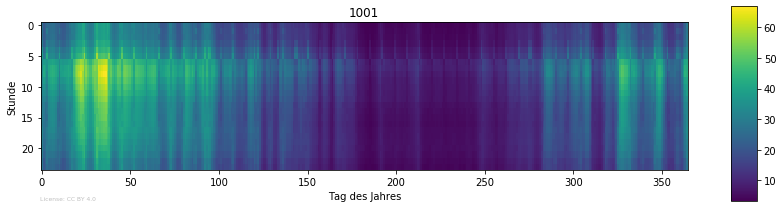

In [8]:
# or plot your data using
plot.heatmap_timeseries(df_CTS_gas[1001], unit = 'MWh')

In [4]:
# save your data
df_CTS_gas[1001].to_csv('./data_out/CTS_Gas_2015_MWh.csv')

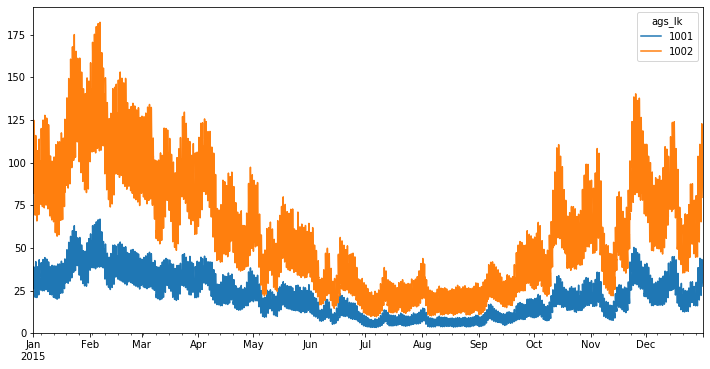

In [13]:
# plot your data
df_CTS_gas[[1001, 1002]].plot(figsize=(12,6), ylim = 0)

### Function disagg_temporal_industry()
- Disagreggate spatial data of industry **power** and **gas** demand per hour for all districts in **MWh**
- returns DataFrame with districts as columns and timesteps as rows
- if detailed = True, returns DataFrame with multiindex in columns with level=0 for districts and level=1 for branches, timesteps as rows
- power level has 2 levels according to shift, with the lower level being set by ``low``, default is 0.35, meaning that the lower level is 35% of the higher level
- Uses temporal and spatial functions like `shift_load_profile_generator()`, `disagg_CTS_industry()` and information from `config.py`

In [46]:
df_gas_industry = temporal.disagg_temporal_industry(source='gas', detailed=False, use_nuts3code=False, low=0.35)

disaggregator.temporal: INFO     Working on state: SH.
disaggregator.temporal: INFO     ... creating state-specific load-profiles
disaggregator.temporal: INFO     ... assigning load-profiles to WZs
disaggregator.temporal: INFO     Working on state: HH.
disaggregator.temporal: INFO     ... creating state-specific load-profiles
disaggregator.temporal: INFO     ... assigning load-profiles to WZs
disaggregator.temporal: INFO     Working on state: NI.
disaggregator.temporal: INFO     ... creating state-specific load-profiles
disaggregator.temporal: INFO     ... assigning load-profiles to WZs
disaggregator.temporal: INFO     Working on state: HB.
disaggregator.temporal: INFO     ... creating state-specific load-profiles
disaggregator.temporal: INFO     ... assigning load-profiles to WZs
disaggregator.temporal: INFO     Working on state: NW.
disaggregator.temporal: INFO     ... creating state-specific load-profiles
disaggregator.temporal: INFO     ... assigning load-profiles to WZs
disaggrega

In [47]:
df_gas_industry.head()

,1001,1002,1003,1004,1051,1053,1054,1055,1056,1057,...,16068,16069,16070,16071,16072,16073,16074,16075,16076,16077
2015-01-01 00:00:00,5.048063,2.918361,4.755429,3.493381,54.434832,1.735306,1.51121,3.320147,19.158797,1.185211,...,2.901728,2.902754,5.923122,1.883349,11.319816,10.634086,4.507188,6.381072,3.705415,2.297518
2015-01-01 00:15:00,5.048063,2.918361,4.755429,3.493381,54.434832,1.735306,1.51121,3.320147,19.158797,1.185211,...,2.901728,2.902754,5.923122,1.883349,11.319816,10.634086,4.507188,6.381072,3.705415,2.297518
2015-01-01 00:30:00,5.048063,2.918361,4.755429,3.493381,54.434832,1.735306,1.51121,3.320147,19.158797,1.185211,...,2.901728,2.902754,5.923122,1.883349,11.319816,10.634086,4.507188,6.381072,3.705415,2.297518
2015-01-01 00:45:00,5.048063,2.918361,4.755429,3.493381,54.434832,1.735306,1.51121,3.320147,19.158797,1.185211,...,2.901728,2.902754,5.923122,1.883349,11.319816,10.634086,4.507188,6.381072,3.705415,2.297518
2015-01-01 01:00:00,5.048063,2.918361,4.755429,3.493381,54.434832,1.735306,1.51121,3.320147,19.158797,1.185211,...,2.901728,2.902754,5.923122,1.883349,11.319816,10.634086,4.507188,6.381072,3.705415,2.297518


In [48]:
# export your data using
df_gas_industry.to_csv('./data_out/Industry_Gas_2015_MWh.csv')

(<Figure size 864x216 with 2 Axes>,
 array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000005913A2E2B0>]],
       dtype=object))

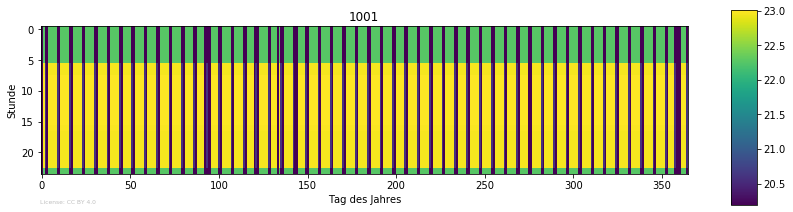

In [49]:
plot.heatmap_timeseries(df_gas_industry[1001].resample('H').sum(), unit = 'MWh')

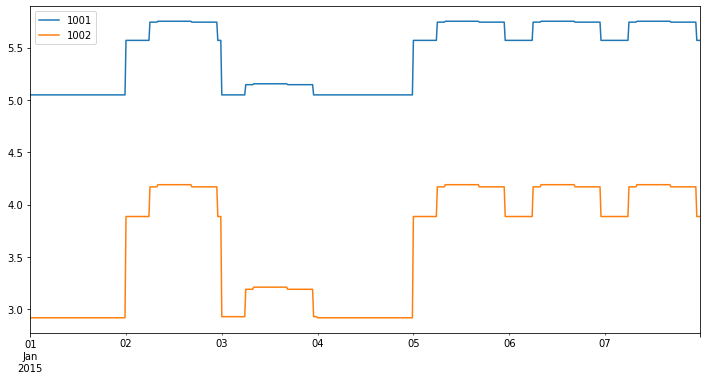

In [50]:
df_gas_industry.loc[:,[1001, 1002]].head(672).plot(figsize=(12,6))